<a href="https://colab.research.google.com/github/M22AIE212/M22AIE212_SpeechUnderstanding_Assignment3/blob/main/A3_Finetune_LA_model_on_FOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Git clone SSL_Anti-spoofing

In [ ]:
!wget https://dl.fbaipublicfiles.com/fairseq/wav2vec/xlsr2_300m.pt

--2024-05-01 05:03:17--  https://dl.fbaipublicfiles.com/fairseq/wav2vec/xlsr2_300m.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.102, 108.157.254.121, 108.157.254.124, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3808868242 (3.5G) [binary/octet-stream]
Saving to: ‘xlsr2_300m.pt’

xlsr2_300m.pt       100%[===================>]   3.55G  24.0MB/s    in 2m 53s  

2024-05-01 05:06:11 (21.0 MB/s) - ‘xlsr2_300m.pt’ saved [3808868242/3808868242]



In [ ]:
!git clone https://github.com/M22AIE212/M22AIE212_SpeechUnderstanding_Assignment3.git

Cloning into 'M22AIE212_SpeechUnderstanding_Assignment3'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 72 (delta 40), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (72/72), 24.38 KiB | 12.19 MiB/s, done.
Resolving deltas: 100% (40/40), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/TakHemlata/SSL_Anti-spoofing.git

Cloning into 'SSL_Anti-spoofing'...
remote: Enumerating objects: 1579, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 1579 (delta 52), reused 82 (delta 48), pack-reused 1489
Receiving objects: 100% (1579/1579), 30.57 MiB | 11.93 MiB/s, done.
Resolving deltas: 100% (293/293), done.


#### Custom Dataset (FOR Dataset)

In [ ]:
!wget 'https://www.eecs.yorku.ca/~bil/Datasets/for-2sec.tar.gz'

!tar -xzvf /content/for-2sec.tar.gz -C /content/

Streaming output truncated to the last 5000 lines.
for-2seconds/training/fake/file23666.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav
for-2seconds/training/fake/file23677.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav
for-2seconds/training/fake/file23680.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav
for-2seconds/training/fake/file23683.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav
for-2seconds/training/fake/file23688.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav
for-2seconds/training/fake/file23689.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav
for-2seconds/training/fake/file23692.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav
for-2seconds/training/fake/file23696.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav
for-2seconds/training/fake/file2370.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav
for-2seconds/training/fake/file23705.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav
for-2seconds/training/fake/file237

## Environment Setup

In [ ]:
!bash /content/M22AIE212_SpeechUnderstanding_Assignment3/setup.sh

fatal: destination path 'SSL_Anti-spoofing' already exists and is not an empty directory.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 2.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.2.1+cu121
    Uninstalling torch-2.2.1+cu121:
      Successfully uninstalled torch-2.2.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.2.1+cu121 requires torch==2.2.1, but you have torch 1.11.0 which is incompatible.
torchdata 0.7.1 requires torch>=2, but you have torch 1.11.0 which is incompatible.
torchtext 0.17.1 requires torch==2.2.1, but you have torch 1.11.0 which is incompatible.
torchvision 0.17.1+cu121 requires torch==2.2.1, but you have torch 1.11.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 65.7 MB/s eta 0:00:00
  Attempting uninstall: torchvision
    F

In [ ]:
!mkdir '/content/LA_finetuned/'

mkdir: cannot create directory ‘/content/LA_finetuned/’: File exists


In [ ]:
!mkdir '/content/DF_finetuned/'

mkdir: cannot create directory ‘/content/DF_finetuned/’: File exists


## LA model Finetuning

Total parameters: 317837834
Model loaded: /content/drive/MyDrive/Assignments/SpeechUnderstanding/A3/LA_model.pth
Epoch:  0 	 Train Loss:  1.0507240747791307 	 Validation Loss:  0.046880988440796044
Epoch:  1 	 Train Loss:  0.5949723372777276 	 Validation Loss:  0.010496380461577247
Epoch:  2 	 Train Loss:  0.3857404253377657 	 Validation Loss:  0.006490835705144491
Epoch:  3 	 Train Loss:  0.26457969116330227 	 Validation Loss:  0.002946423094717829
Scores are saved to /content/finetuned_la_score.txt
EER (Equal Error Rate) for LA model :  0.015


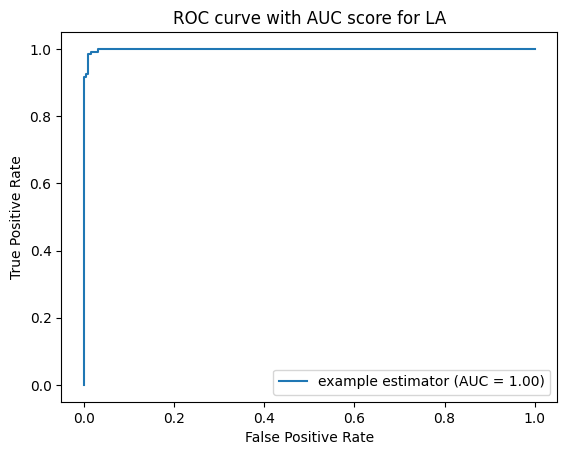

In [ ]:
import pandas as pd
import glob
import sys
import torch
from torch.utils.data import Dataset,DataLoader
sys.path.append("/content/M22AIE212_SpeechUnderstanding_Assignment3")
sys.path.append("/content/SSL_Anti-spoofing")
from utils import convert_to_flac,Arguments,produce_evaluation_file,compute_eer,plot_roc_curve_with_auc
from utils import CustomDataset
from model import Model
from model_loader import ModelLoader
from train import train_epoch
from eval import evaluate_accuracy
import os

# Training and validation of LA for funtuning
batch_size = 2
num_epochs = 4
model_save_path = '/content/drive/MyDrive/Assignments/SpeechUnderstanding/A3/'

#set device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Arguments
args = Arguments(
    la_model_path='/content/drive/MyDrive/Assignments/SpeechUnderstanding/A3/LA_model.pth',
    df_model_path='/content/drive/MyDrive/Assignments/SpeechUnderstanding/A3/Best_LA_model_for_DF.pth',
    eval=True,
    la_eval_output='/content/finetuned_la_score.txt',
    df_eval_output='/content/finetuned_df_score.txt'
)

df = pd.DataFrame(glob.glob("/content/for-2seconds/*/*/*.wav"), columns = ['file_path'])
df['real_or_fake'] = df['file_path'].apply(lambda x : x.split('/')[-2])
df['split_type'] = df['file_path'].apply(lambda x : x.split('/')[-3])
df['label'] = df['real_or_fake'].apply(lambda x : 1 if x=='real' else 0)
df = df.sample(len(df))

train_set = CustomDataset(df[df.split_type == 'training']['file_path'].tolist()[:2000],
                        df[df.split_type == 'training']['label'].tolist()[:2000])
test_set = CustomDataset(df[df.split_type == 'testing']['file_path'].tolist()[:400],
                        df[df.split_type == 'testing']['label'].tolist()[:400])
validation_set = CustomDataset(df[df.split_type == 'validation']['file_path'].tolist()[:400],
                        df[df.split_type == 'validation']['label'].tolist()[:400])


model_loader = ModelLoader(args, device)
model = model_loader.load_model('la')

optimizer = torch.optim.Adam(model.parameters(), lr=args.lr,weight_decay=args.weight_decay)

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=False, drop_last=False)
dev_loader = DataLoader(validation_set, batch_size=batch_size, shuffle=False, drop_last=False)

## Training - LA
best_validation_loss = float('inf')
for epoch in range(num_epochs):
    running_loss = train_epoch(train_loader, model, args.lr, optimizer, device)
    validation_loss = evaluate_accuracy(dev_loader, model, device)
    print("Epoch: ", epoch, '\t', 'Train Loss: ', running_loss, '\t', 'Validation Loss: ', validation_loss)
    if validation_loss < best_validation_loss:
        best_validation_loss = validation_loss
        torch.save(model.state_dict(), os.path.join(model_save_path, 'best_finetuned_LA_model.pth'))

## Inference - LA
batch_size = 2
##inference using LA model, & saving scores in txt files
produce_evaluation_file(test_set,batch_size, model, device, args.la_eval_output)

la_df = pd.read_csv('/content/finetuned_la_score.txt', sep = ' ', header = None)
la_df.columns = ['actual', 'scores']

la_eer = compute_eer(la_df.actual, la_df.scores)
print("EER (Equal Error Rate) for LA model : ", round(la_eer, 4))

#plotting roc cureve with auc for LA model
plot_roc_curve_with_auc(la_df.actual, la_df.scores, 'la')